1.menentukan Library 


In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')
from sklearn import svm
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score,confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix



2.Load dataset

In [2]:
diabetes_dataset = pd.read_csv('diabetes.csv')
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

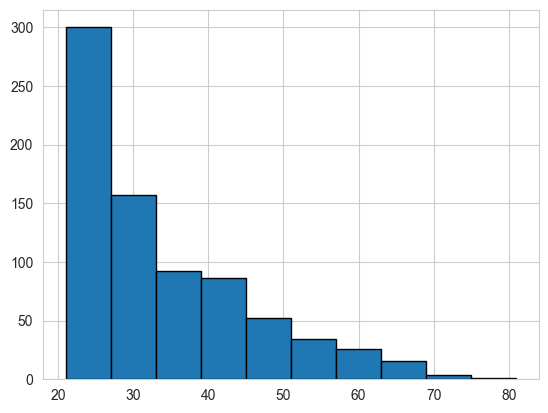

In [5]:
diabetes_dataset["Age"].hist(edgecolor = "black")

In [6]:
print("Max Age: " + str(diabetes_dataset["Age"].max()) + " Min Age: " + str(diabetes_dataset["Age"].min()))

Max Age: 81 Min Age: 21


In [7]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
diabetes_dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [9]:
diabetes_dataset.shape

(768, 9)

In [10]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [11]:
#memisahkan data dan label
X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [12]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [13]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


3.Standarisasi Data


 4.memisahkan data training dan data testing

In [14]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, stratify=Y, random_state=20)
print('X_Train = ',X_train.shape)
print('X_Test = ',X_test.shape)
print('Y_Train = ',Y_train.shape)
print('Y_Test = ',Y_test.shape)

X_Train =  (614, 8)
X_Test =  (154, 8)
Y_Train =  (614,)
Y_Test =  (154,)


5.Membuat data latih menggunakan algoritma svm

In [15]:
classifier =svm.SVC(kernel='linear')

In [16]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

6.Membuat model evaluasi untuk mengukur akurasi

In [17]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)



In [18]:
X_train_prediction = classifier.predict(X_train)
jumlah_prediksi_benar = sum(X_train_prediction == Y_train)
jumlah_total_sampel = len(Y_train)
print('Jumlah prediksi benar adalah : ',jumlah_prediksi_benar)
print('Jumlah total sampel : ',jumlah_total_sampel)

Jumlah prediksi benar adalah :  476
Jumlah total sampel :  614


In [19]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)
print('Akurasi data training adalah =', training_data_accuracy)



Akurasi data training adalah = 0.7752442996742671


In [20]:
TP = sum((X_test_prediction == 1) & (Y_test == 1))
print('Nilai True Positive : ',TP)
TN = sum((X_test_prediction == 0) & (Y_test == 0))
print('Nilai True Negative : ',TN)
FP = sum((X_test_prediction == 1) & (Y_test == 0))
print('Nilai False Positive : ',FP)
FN = sum((X_test_prediction == 0) & (Y_test == 1))
print('Nilai False Negative : ',FN)



Nilai True Positive :  30
Nilai True Negative :  94
Nilai False Positive :  6
Nilai False Negative :  24


In [21]:
#didapat dari TP + TN + FP + FN
jumlah_total_sampel_pengujian = len(Y_test)  
print('Jumlah Total Sampel Data Pengujian adalah =', jumlah_total_sampel_pengujian)

Jumlah Total Sampel Data Pengujian adalah = 154


In [22]:

# Memprediksi label pada data pengujian menggunakan model
X_test_prediction = classifier.predict(X_test)

# Menghitung jumlah prediksi yang benar
jumlah_prediksi_benar = sum(X_test_prediction == Y_test)

print('Jumlah Prediksi Benar adalah =', jumlah_prediksi_benar)



Jumlah Prediksi Benar adalah = 124


In [23]:
print('Akurasi data testing adalah = ',test_data_accuracy)

Akurasi data testing adalah =  0.8051948051948052


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report

# Memprediksi label pada data pengujian menggunakan model
X_test_prediction = classifier.predict(X_test)
print(classification_report(Y_test,X_test_prediction))


# Menghitung metrik evaluasi
accuracy = accuracy_score(Y_test, X_test_prediction)
precision = precision_score(Y_test, X_test_prediction)
recall = recall_score(Y_test, X_test_prediction)
f1 = f1_score(Y_test, X_test_prediction)

# Menghitung confusion matrix
confusion = confusion_matrix(Y_test, X_test_prediction)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)




              precision    recall  f1-score   support

           0       0.80      0.94      0.86       100
           1       0.83      0.56      0.67        54

    accuracy                           0.81       154
   macro avg       0.81      0.75      0.76       154
weighted avg       0.81      0.81      0.79       154

Accuracy: 0.8051948051948052
Precision: 0.8333333333333334
Recall: 0.5555555555555556
F1 Score: 0.6666666666666667


7.membuat model prediksi

In [25]:
input_data =(6,148,72,35,0,33.6,0.627,50)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)


prediction =classifier.predict(input_data_reshape)
print(prediction)

if(prediction[0] == 0):
    print('Pasien Negatif terkena diabetes')
else :
    print('Pasien Positif diabetes')

[1]
Pasien Positif diabetes


8.simpan model

In [26]:
import pickle

In [27]:
filename = 'diabetes_model.sav'
pickle.dump(classifier,open(filename,'wb'))